# Settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from numpy.random import randn
import copy

# AIC Information Criterion

In [2]:
from sklearn.linear_model import LinearRegression
import itertools

In [3]:
res = LinearRegression()

In [8]:
def RSS_min(X, y, T):
  """
  :param X: features
  :param y: answer / label
  :param T: feature combinations
  :return: S_min, set_q: min RSS and feature combination
  """
  S_min = np.inf
  m = len(T)
  for j in range(m):
    q = T[j]
    res.fit(X[:, q], y)
    y_hat = res.predict(X[:, q])
    S = np.linalg.norm(y_hat - y)**2
    if S < S_min:
      S_min = S
      set_q = q
  
  return (S_min, set_q)

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()
X = boston.data[:, [0, 2, 4, 5, 6, 7, 9, 10, 11, 12]]
y = boston.target

In [12]:
def AIC(X, y):
  n, p = X.shape
  AIC_min = np.inf
  for k in range(1, p+1):
    # pick up k features from p features (k <= p)
    T = list(itertools.combinations(range(p), k))
    # return minimum RSS and k features in T
    S_min, set_q = RSS_min(X, y, T)
    AIC = n * np.log(S_min) + 2 * k
    if AIC < AIC_min:
      AIC_min = AIC
      set_min = set_q
  print(AIC_min, set_min)

In [13]:
AIC(X, y)

4770.415163216072 (0, 2, 3, 5, 7, 8, 9)


# BIC Information Criterion

In [16]:
def BIC(X, y):
  n, p = X.shape
  BIC_min = np.inf
  for k in range(1, p+1):
    # pick up k features from p features (k <= p)
    T = list(itertools.combinations(range(p), k))
    # return minimum RSS and k features in T
    S_min, set_q = RSS_min(X, y, T)
    BIC = n * np.log(S_min) + k * np.log(n)
    if BIC < BIC_min:
      BIC_min = BIC
      set_min = set_q
  print(BIC_min, set_min)

In [17]:
BIC(X, y)

4796.644613310488 (2, 3, 5, 7, 8, 9)


# Adjusted Coefficient of Determination

In [26]:
def TSS(y):
  tss = np.linalg.norm(y - np.average(y))**2
  return tss

In [24]:
def AR2(X, y):
  n, p = X.shape
  AR_max = -np.inf
  for k in range(1, p+1):
    # pick up k features from p features (k <= p)
    T = list(itertools.combinations(range(p), k))
    # return minimum RSS and k features in T
    rss, set_q = RSS_min(X, y, T)
    tss = TSS(y)
    AR = 1 - rss/(n - k - 1)/tss/(n - 1)
    if AR > AR_max:
      AR_max = AR
      set_max = set_q
  print(AR_max, set_max)

In [27]:
AR2(X, y)

0.9999988747038264 (0, 2, 3, 5, 7, 8, 9)


# Relationship between AIC/BIC and number of features

In [28]:
def IC(X, y, k):
  n, p = X.shape
  T = list(itertools.combinations(range(p), k))
  S, set_q = RSS_min(X, y, T)
  AIC = n * np.log(S) + 2 * k
  BIC = n * np.log(S) + k * np.log(n)
  return {'AIC': AIC, 'BIC': BIC}

In [29]:
AIC_seq = []; BIC_seq = []
for k in range(1, p+1):
  ic_dic = IC(X, y, k)
  AIC_seq.append(ic_dic['AIC'])
  BIC_seq.append(ic_dic['BIC'])
x_seq = np.arange(1, p+1, 1)

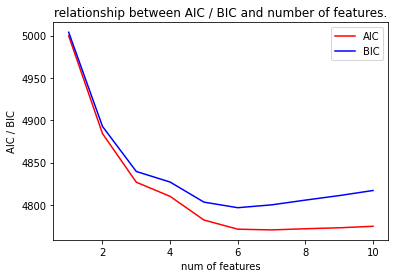

In [31]:
plt.plot(x_seq, AIC_seq, c='red', label='AIC')
plt.plot(x_seq, BIC_seq, c='blue', label='BIC')
plt.xlabel('num of features')
plt.ylabel('AIC / BIC')
plt.title('relationship between AIC / BIC and number of features.')
plt.legend()

* BIC is bigger than AIC.  
* BIC uses a larger weight for the number of features than AIC, so BIC prefers a simpler model.